#### Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load CSV files into DataFrames
transactions_df = pd.read_csv('transaction_data.csv')
demographic_df = pd.read_csv('hh_demographic.csv')
products_df = pd.read_csv('product.csv') 


In [2]:
transactions_df.head(10)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0.0,0.0
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0.0,0.0
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0.0,0.0
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0


Data Cleaning

In [3]:
transactions_df.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
transactions_df.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00
mean,1271.95,34026199138.89,388.76,2891435.16,100.43,3.10,3142.67,-0.54,1561.59,56.22,-0.02,-0.00
std,726.07,4711649037.86,189.72,3837403.69,1153.44,4.18,8937.11,1.25,399.84,27.10,0.22,0.04
min,1.00,26984851472.00,1.00,25671.00,0.00,0.00,1.00,-180.00,0.00,1.00,-55.93,-7.70
25%,656.00,30408046256.00,229.00,917459.00,1.00,1.29,330.00,-0.69,1308.00,33.00,0.00,0.00
50%,1272.00,32760806548.00,390.00,1028816.00,1.00,2.00,372.00,-0.01,1613.00,56.00,0.00,0.00
75%,1913.00,40126853628.00,553.00,1133018.00,1.00,3.49,422.00,0.00,1843.00,80.00,0.00,0.00
max,2500.00,42305362535.00,711.00,18316298.00,89638.00,840.00,34280.00,3.99,2359.00,102.00,0.00,0.00


#### RMF

Recency: How recently a customer made a purchase.
You’ll use the DAY column to calculate this.

Frequency: How often a customer makes purchases.
This will be derived from how many transactions each customer made (BASKET_ID per household_key).

Monetary: How much money a customer spends.
This will be the total of the SALES_VALUE for each customer (household_key).

Steps for RFM Analysis:
Recency:
Calculate how recently each customer made a purchase. We can use the WEEK_NO or the timestamp from your data to compute the number of weeks or days since the customer last made a purchase.

Frequency:
Count how many times each customer has made a purchase. We can use customer IDs (if available) or transaction IDs to group and count how many times each customer appears in the dataset.

Monetary Value:
Sum the total SALES_VALUE for each customer. This will show how much they’ve spent overall.

In [5]:
transactions_df.head(4)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.00,0.00
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.00,0.00


array([[<Axes: title={'center': 'QUANTITY'}>,
        <Axes: title={'center': 'SALES_VALUE'}>],
       [<Axes: title={'center': 'TRANS_TIME'}>,
        <Axes: title={'center': 'WEEK_NO'}>],
       [<Axes: title={'center': 'COUPON_DISC'}>,
        <Axes: title={'center': 'COUPON_MATCH_DISC'}>]], dtype=object)

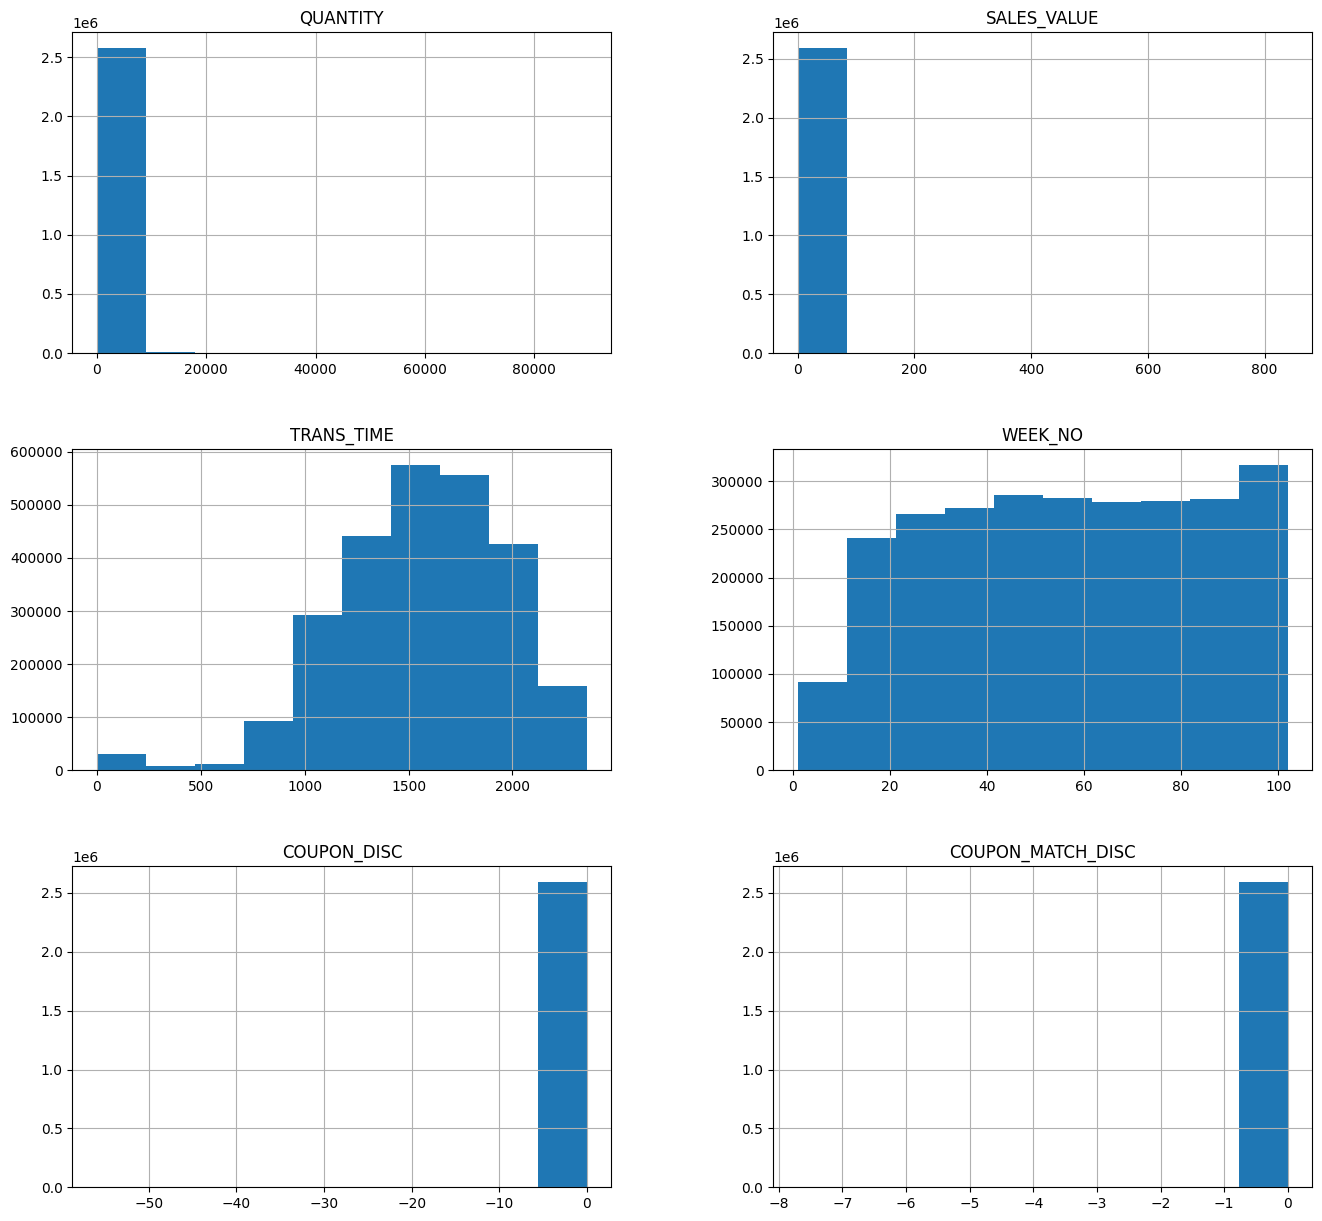

In [6]:
transactions_df[["QUANTITY","SALES_VALUE","TRANS_TIME","WEEK_NO","COUPON_DISC","COUPON_MATCH_DISC"]].hist(figsize=(16,15)) 

In [7]:

import pandas as pd
import numpy as np

# Step 1: Create RFM Table
# Assuming customer id is present in the dataset (if not, we need a proxy like Transaction ID)
# Ensure these column names match the dataset
transactions_df['DAY'] = pd.to_datetime(transactions_df['WEEK_NO'])  # Convert WEEK_NO to a date (you might need actual dates for recency)

# Set reference date as the max transaction date (latest purchase)
reference_date = transactions_df['DAY'].max() + pd.DateOffset(1)

# Recency: How many days since the customer's last purchase
rfm = transactions_df.groupby('BASKET_ID').agg({
    'DAY': lambda x: (reference_date - x.max()).days,  # Recency
    'BASKET_ID': 'count',  # Frequency
    'SALES_VALUE': 'sum'  # Monetary value
})

# Rename the columns appropriately after aggregation
rfm.rename(columns={'DAY': 'Recency', 'BASKET_ID': 'Frequency', 'SALES_VALUE': 'Monetary'}, inplace=True)

# Step 2: Score RFM values using equal-width bins (pd.cut)
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])

# Step 3: Calculate RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Create segmentation map for customers based on RFM Score
seg_map = {
    r'[1-2][1-2]': 'Bronze',
    r'[1-2][3-4]': 'Silver',
    r'[3-4][1-2]': 'Gold',
    r'[3-4][3-4]': 'Platinum'
}

# Segment customers based on their RFM score
rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

# Step 4: View RFM Analysis Results
print(rfm.head())

# Save RFM results for further analysis
rfm.to_csv('rfm_analysis_results.csv')


             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
BASKET_ID                                                                     
26984851472        1          5      5.91       3       1       1       311   
26984851516        1          6     12.43       3       1       1       311   
26984896261        1          5     11.37       3       1       1       311   
26984905972        1          5      2.55       3       1       1       311   
26984945254        1          3      3.53       3       1       1       311   

             Segment  
BASKET_ID             
26984851472  3Bronze  
26984851516  3Bronze  
26984896261  3Bronze  
26984905972  3Bronze  
26984945254  3Bronze  


#### More Analysis

In [73]:
print(rfm.columns)


Index(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score',
       'RFM_Score', 'Segment'],
      dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_868\1612965638.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Frequency_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=frequency_labels)
C:\Users\USER\AppData\Local\Temp\ipykernel_868\1612965638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Monetary_Score'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=monetary_labels)
C:\Users\USER\AppData\Local\Temp\ipykernel_868\1612965638.py:19: SettingWithCopyWarning: 
A value is t

RFM_Segment
Platinum_Platinum    54256
Bronze_Bronze        50961
Gold_Gold            32566
Silver_Silver        31781
Bronze_Silver        19121
Gold_Silver          17790
Bronze_Gold          16870
Silver_Bronze        16286
Platinum_Gold        10069
Silver_Gold           9606
Gold_Platinum         8486
Bronze_Platinum       5017
Silver_Platinum       1347
Gold_Bronze            975
Platinum_Silver        405
Platinum_Bronze          6
Name: count, dtype: int64


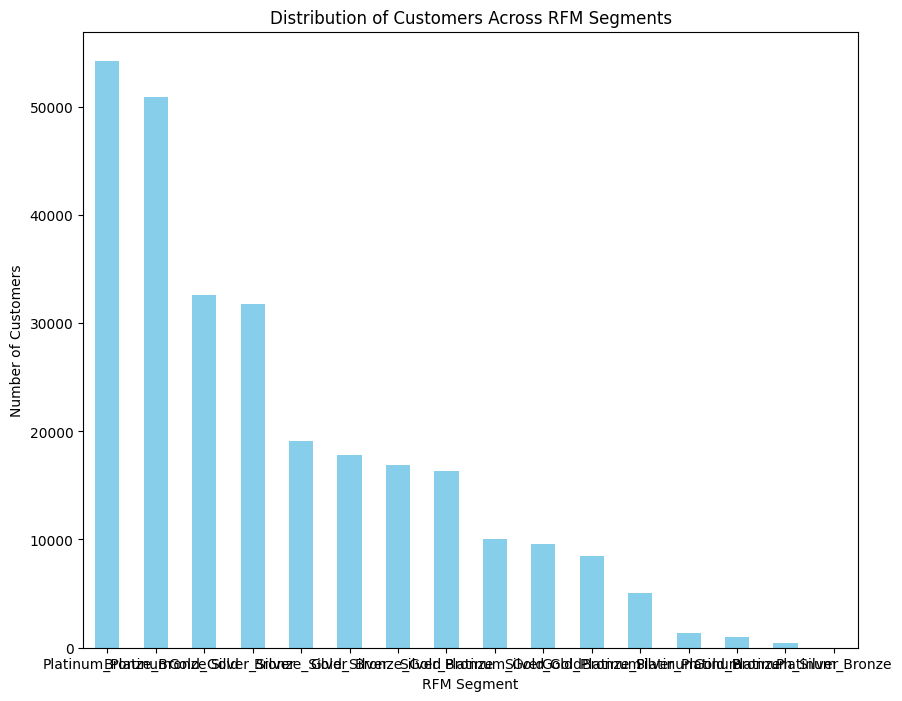

In [85]:
import pandas as pd

# Assuming 'df' has columns 'Recency', 'Frequency', 'Monetary' (RFM data)
# Adjust Frequency and Monetary based on custom bins

# Frequency Bins
frequency_bins = [0, 2, 5, 12, 168]  # Example frequency bins
frequency_labels = ['Bronze', 'Silver', 'Gold', 'Platinum']

rfm['Frequency_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=frequency_labels)

# Monetary Bins
monetary_bins = [0, 6.96, 17.07, 36.28, 961.49]  # Example monetary bins
monetary_labels = ['Bronze', 'Silver', 'Gold', 'Platinum']

rfm['Monetary_Score'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=monetary_labels)

# Combine Frequency and Monetary scores to form the overall RFM segment
rfm['RFM_Segment'] = rfm['Frequency_Score'].astype(str) + "_" + rfm['Monetary_Score'].astype(str)

# View the distribution of the segments
segment_distribution = rfm['RFM_Segment'].value_counts()
print(segment_distribution)

# Plot the distribution of customers across segments
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
rfm['RFM_Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


In [86]:
# Assuming 'rfm' is your DataFrame containing the RFM result
print(rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']])


             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
BASKET_ID                                                                     
26984851472        1          5      5.91       4       2       1       421   
26984851516        1          6     12.43       4       3       2       432   
26984896261        1          5     11.37       4       2       2       422   
26984905972        1          5      2.55       4       2       1       421   
26984945254        1          3      3.53       4       2       1       421   
...              ...        ...       ...     ...     ...     ...       ...   
42302712006        1          4      9.78       4       2       2       422   
42302712189        1          5     33.64       4       2       3       423   
42302712298        1         11     40.70       4       3       4       434   
42305362497        1          5      5.61       4       2       1       421   
42305362535        1          9     32.32       4   

In [87]:
print(rfm.head())

# Save RFM results for further analysis
rfm.to_csv('rfm_analysis_results.csv')

             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
BASKET_ID                                                                     
26984851472        1          5      5.91       4       2       1       421   
26984851516        1          6     12.43       4       3       2       432   
26984896261        1          5     11.37       4       2       2       422   
26984905972        1          5      2.55       4       2       1       421   
26984945254        1          3      3.53       4       2       1       421   

            Segment Frequency_Score Monetary_Score    RFM_Segment  
BASKET_ID                                                          
26984851472    Gold          Silver         Bronze  Silver_Bronze  
26984851516    Gold            Gold         Silver    Gold_Silver  
26984896261    Gold          Silver         Silver  Silver_Silver  
26984905972    Gold          Silver         Bronze  Silver_Bronze  
26984945254    Gold          Silver   

## Bar Chart – RFM Segment Distribution

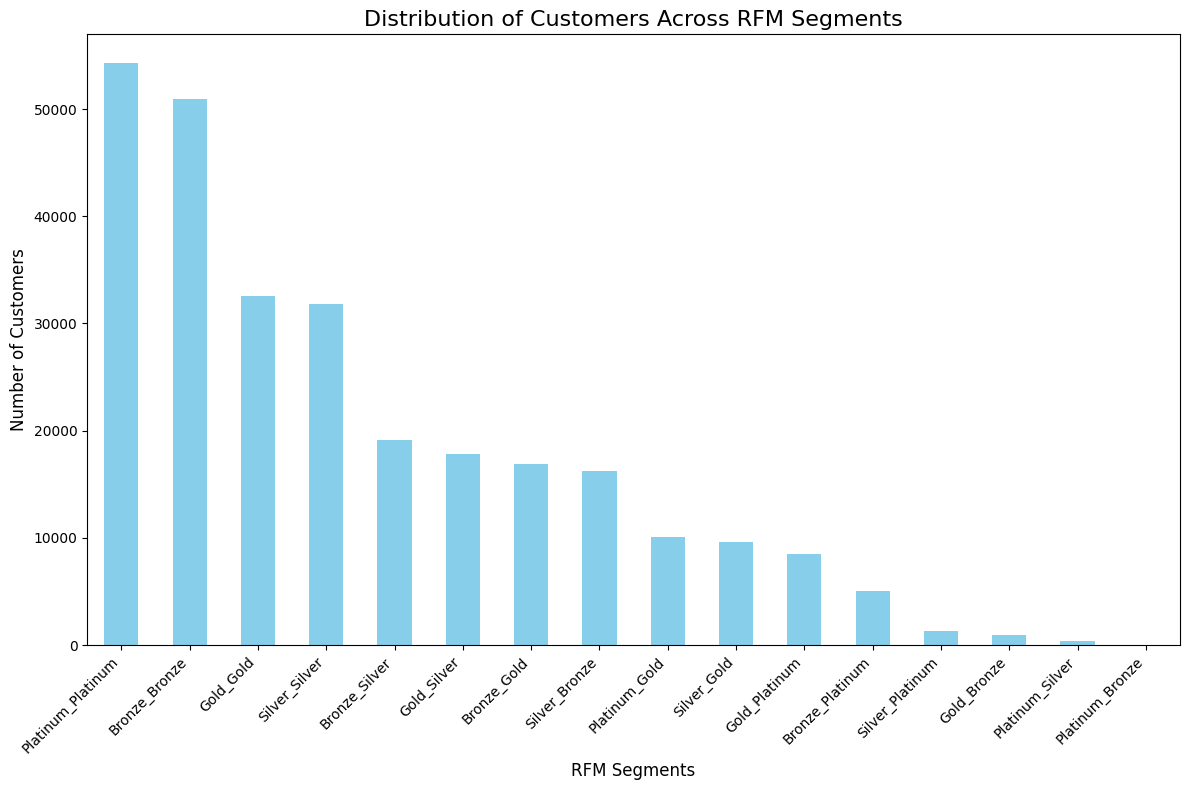

In [88]:
import matplotlib.pyplot as plt

# Group by the RFM Segment and count the number of customers in each segment
rfm_segment_counts = rfm['RFM_Segment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 8))
rfm_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across RFM Segments', fontsize=16)
plt.xlabel('RFM Segments', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Pie Chart – Percentage Distribution of Customers by RFM Segment

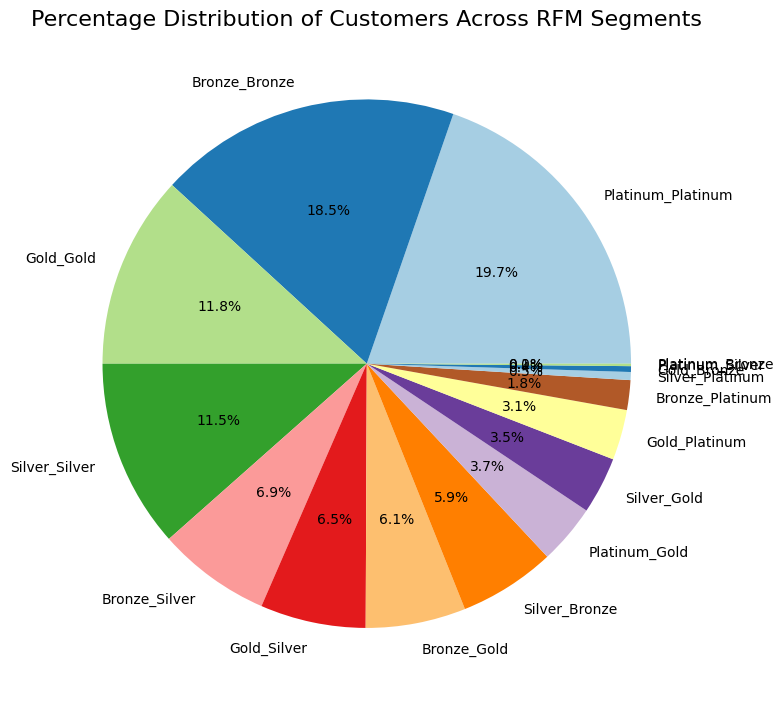

In [90]:
# Plot the pie chart
plt.figure(figsize=(8, 9))
rfm_segment_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Customers Across RFM Segments', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


## Heatmap – RFM Scores Distribution (Recency, Frequency, and Monetary)

C:\Users\USER\AppData\Local\Temp\ipykernel_868\4227804510.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_scores = rfm[['R_Score', 'F_Score', 'M_Score']].groupby(['R_Score', 'F_Score', 'M_Score']).size().reset_index(name='Customer Count')
C:\Users\USER\AppData\Local\Temp\ipykernel_868\4227804510.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm_scores.pivot_table(index='R_Score', columns=['F_Score', 'M_Score'], values='Customer Count', aggfunc='sum', fill_value=0)


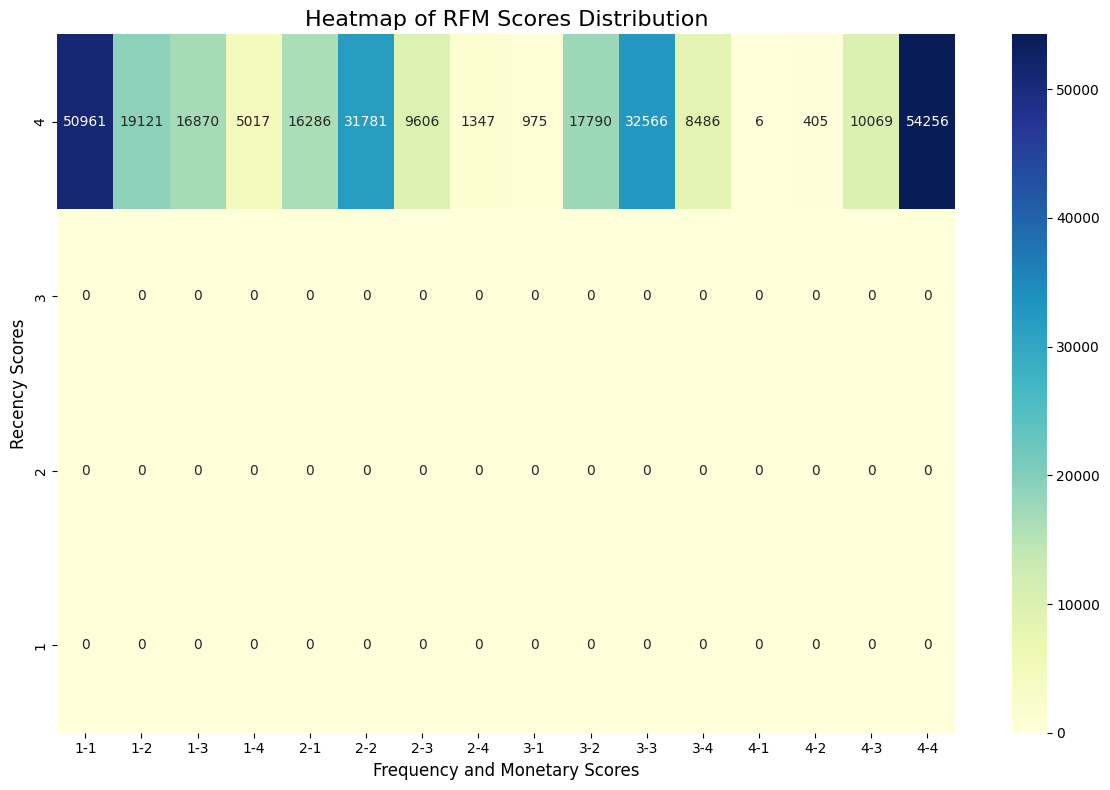

In [91]:
import seaborn as sns

# Create a heatmap of the Recency, Frequency, and Monetary scores
rfm_scores = rfm[['R_Score', 'F_Score', 'M_Score']].groupby(['R_Score', 'F_Score', 'M_Score']).size().reset_index(name='Customer Count')

# Pivot for heatmap
rfm_pivot = rfm_scores.pivot_table(index='R_Score', columns=['F_Score', 'M_Score'], values='Customer Count', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rfm_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap of RFM Scores Distribution', fontsize=16)
plt.xlabel('Frequency and Monetary Scores', fontsize=12)
plt.ylabel('Recency Scores', fontsize=12)
plt.tight_layout()
plt.show()


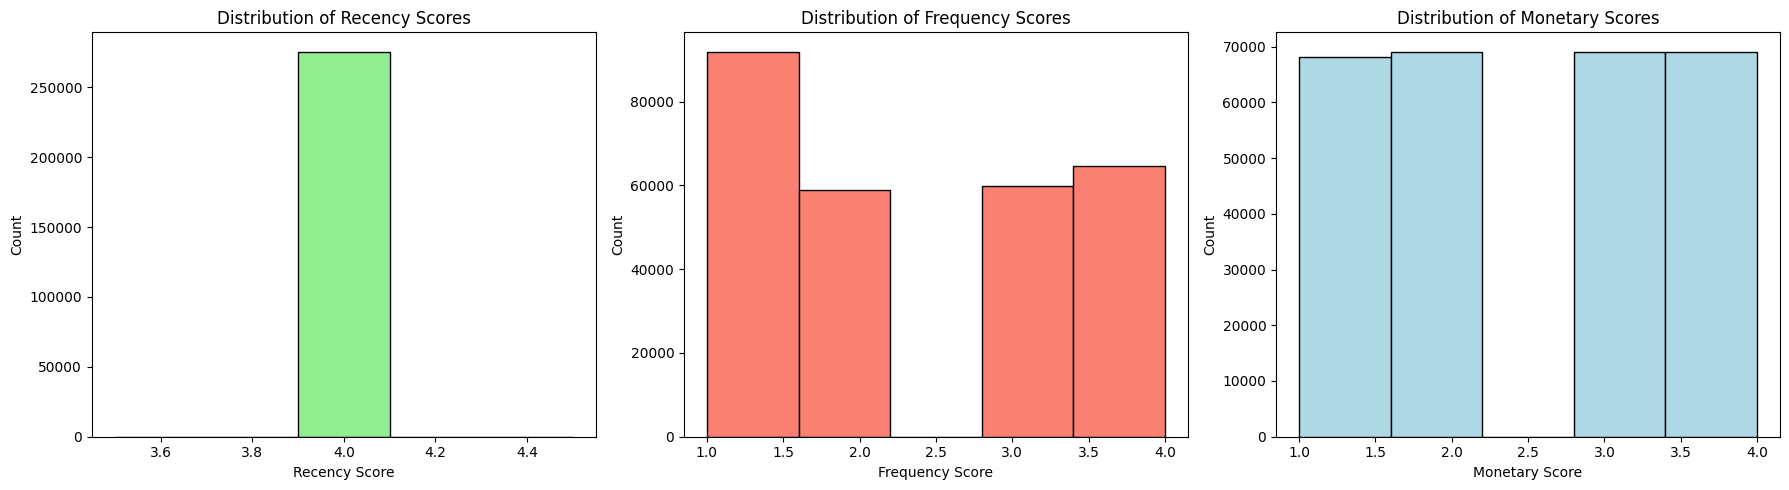

In [92]:
# Histograms for Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Histogram
axes[0].hist(rfm['R_Score'], bins=5, color='lightgreen', edgecolor='black')
axes[0].set_title('Distribution of Recency Scores')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Count')

# Frequency Histogram
axes[1].hist(rfm['F_Score'], bins=5, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Frequency Scores')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Count')

# Monetary Histogram
axes[2].hist(rfm['M_Score'], bins=5, color='lightblue', edgecolor='black')
axes[2].set_title('Distribution of Monetary Scores')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [95]:
rfm.shape
rfm.head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Frequency_Score,Monetary_Score,RFM_Segment
BASKET_ID,,,,,,,,,,,
26984851472,1,5,5.91,4,2,1,421,Gold,Silver,Bronze,Silver_Bronze
26984851516,1,6,12.43,4,3,2,432,Gold,Gold,Silver,Gold_Silver
26984896261,1,5,11.37,4,2,2,422,Gold,Silver,Silver,Silver_Silver
26984905972,1,5,2.55,4,2,1,421,Gold,Silver,Bronze,Silver_Bronze
26984945254,1,3,3.53,4,2,1,421,Gold,Silver,Bronze,Silver_Bronze
26984951769,1,5,5.79,4,2,1,421,Gold,Silver,Bronze,Silver_Bronze
26985025264,1,17,44.78,4,4,4,444,Gold,Platinum,Platinum,Platinum_Platinum
26985040735,1,50,139.22,4,4,4,444,Gold,Platinum,Platinum,Platinum_Platinum
26985052379,1,1,0.99,4,1,1,411,Gold,Bronze,Bronze,Bronze_Bronze




### The RFM Model
RFM stands for **Recency**, **Frequency**, and **Monetary**. These three metrics help you segment customers based on their purchasing behavior:

- **Recency (R):** How recently did the customer make their last purchase? A lower value means the customer purchased recently, and a higher value means it has been a while since their last purchase.
- **Frequency (F):** How often has the customer made a purchase in a specific time frame? A higher value means they purchase frequently, and a lower value means they purchase less often.
- **Monetary (M):** How much has the customer spent in total? Higher values indicate more spending, while lower values indicate less spending.

###  Data Output
### Understanding the RFM Model in Market Basket Analysis

In your retail intelligence project, you conducted a Market Basket Analysis using the **RFM (Recency, Frequency, Monetary)** model. This model is commonly used in customer segmentation to help businesses identify groups of customers based on their purchasing behaviors. Let’s break down what the RFM model is, what each component means, and how to interpret your results.

---

### What is the RFM Model?

The RFM model segments customers by looking at three main metrics:

1. **Recency (R)**: How recently a customer made a purchase.
   - Customers who made a recent purchase are generally more likely to make another purchase.
   - The "Recency" score often reflects how likely a customer is to engage again soon.

2. **Frequency (F)**: How often a customer makes purchases.
   - Customers who purchase frequently are considered more loyal and valuable.

3. **Monetary (M)**: How much a customer spends on purchases.
   - Customers who spend more money are generally considered more valuable to the business.

Each customer receives a score for each of these dimensions, which helps in categorizing them into different segments.

---

### Explanation of the Data Output

Here's an example of your RFM data output:

```plaintext
             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
BASKET_ID                                                                     
26984851472        1          5      5.91       4       2       1       421   
26984851516        1          6     12.43       4       3       2       432   
...              ...        ...       ...     ...     ...     ...       ...   
```

**Columns Explanation:**

- **BASKET_ID**: Unique identifier for each customer’s transaction (or basket).
- **Recency**: Indicates the number of days since the last purchase. In this example, all customers have a "Recency" of 1 (likely meaning recent transactions).
- **Frequency**: Number of times a customer has made a purchase.
- **Monetary**: Total amount spent by the customer.
- **R_Score, F_Score, M_Score**: Scores for each dimension (Recency, Frequency, and Monetary) calculated based on specific criteria:
   - Each score (R, F, M) ranges from 1 to 4 (or more), where 1 typically represents a lower value and 4 represents a higher value.
   - Higher "R_Score" means a more recent purchase, while higher "F_Score" and "M_Score" indicate higher frequency and monetary value, respectively.
- **RFM_Score**: A three-digit combination of R, F, and M scores. For instance, `421` means a Recency score of 4, Frequency score of 2, and Monetary score of 1.
- **RFM_Segment**: This is a label created by combining RFM scores. Common segments might include terms like "Gold_Silver" or "Silver_Bronze," depending on the scores.

---

### Segment Interpretation and Observations

Your results reveal a diverse segmentation, which helps in understanding customer behaviors more effectively. Here’s what each segment type generally represents:

1. **Platinum_Platinum**: High scores across all dimensions (R, F, M). These are your **top-tier customers** — highly loyal, frequent shoppers, with high spending.
   - Example: 54,256 customers fall in this segment.
  
2. **Bronze_Bronze**: Lower scores across R, F, and M. These are **less engaged customers** who don’t shop frequently and have lower spendings.
   - Example: 50,961 customers in this category.

3. **Gold_Gold and Silver_Silver**: These represent mid-tier segments.
   - **Gold_Gold**: Loyal and high-frequency customers, but may not spend as much as Platinum customers.
   - **Silver_Silver**: Moderate frequency and spending customers.

4. **Mixed Segments (e.g., Bronze_Silver, Gold_Silver)**: These represent customers with mixed loyalty and spending patterns, reflecting varying engagement levels.

---
1. Platinum_Platinum Segment (54,256 customers)
Characteristics: These customers have high scores in Recency, Frequency, and Monetary value, making them your most valuable and engaged customers. They shop frequently, spend a lot, and have done so recently.
Interpretation: This is your top-tier group — they’re loyal, frequent, and high-value spenders.
Strategy: Focus on retention and loyalty for this segment. Consider offering exclusive perks, early access to sales, or VIP treatment to maintain their loyalty and make them feel valued.
2. Gold_Gold Segment (32,566 customers)
Characteristics: These customers have relatively high scores in Frequency and Monetary, though slightly lower than Platinum. They shop often and spend significantly, but perhaps not as frequently or as much as Platinum customers.
Interpretation: This is your loyal mid-tier customer group. They are highly engaged but may need a little extra incentive to reach the Platinum level.
Strategy: Target with rewards programs or loyalty bonuses to encourage them to shop more frequently or spend a bit more. Regularly highlight new products or limited-time offers to keep them engaged.
3. Silver_Silver Segment (31,781 customers)
Characteristics: These customers show moderate levels of Frequency and Monetary value. They shop fairly regularly and have an average spending pattern.
Interpretation: These customers are steady shoppers who could become more valuable with the right encouragement.
Strategy: Use targeted promotions to increase their Frequency or Monetary value. Consider offering special discounts or bundled deals to encourage higher spending.
4. Bronze_Bronze Segment (50,961 customers)
Characteristics: This segment has low Recency, Frequency, and Monetary scores. They don’t shop often, and when they do, they spend relatively little.
Interpretation: This is your least engaged group. They’re at risk of not returning unless re-engaged.
Strategy: Focus on reactivation campaigns. Send personalized messages to remind them of the brand, offer incentives to shop again, or introduce new products that might interest them. Discounts and free shipping could also attract them back.
Mixed Segments (e.g., Gold_Silver, Bronze_Silver)
Characteristics: These segments contain customers with mixed levels of engagement. For example, a Gold_Silver customer might shop frequently but spend less, while a Bronze_Silver customer shops infrequently but could spend moderately when they do.
Interpretation: These mixed segments represent customers with varying behavior patterns that don’t fit neatly into the main groups.
Strategy: Use targeted marketing for each mixed group. For example:
Gold_Silver: Encourage higher spending with premium products or larger cart discounts.
Bronze_Silver: Encourage them to shop more often by creating engaging campaigns or offering reminders on products they might like.
Key Observations and Overall Interpretation
Balanced Segmentation: You now have a good spread of customers across various RFM segments. Previously, the Gold segment was dominant, but now you have a more balanced mix across Platinum, Gold, Silver, and Bronze categories. This diversity allows for more targeted marketing and retention strategies for each group.

Potential Imbalances in Specific Combinations: Some combinations, like Platinum_Bronze or Silver_Platinum, have relatively few customers. This might indicate that certain scoring criteria need further refinement to capture nuanced behaviors. However, small segment sizes are not necessarily a problem if these groups represent genuinely unique purchasing patterns.

Business Alignment: This segmentation provides insights that align with business goals:

Top segments (Platinum, Gold): Retain and engage high-value customers.
Lower segments (Bronze, Silver): Encourage re-engagement and try to increase spending or frequency.

### Analysis and Insights

- **Balanced Segmentation**: Unlike your initial output, where the Gold segment dominated, you now have a more balanced spread across segments (e.g., Platinum_Platinum, Bronze_Bronze, Gold_Gold, etc.). This diverse segmentation allows for more targeted marketing and engagement.
  
- **Observing Imbalances**: While your segmentation looks balanced overall, some specific combinations (e.g., **Platinum_Bronze** or **Silver_Platinum**) have fewer customers. This might indicate that customers in these segments have unique behaviors that the current bin ranges don’t capture well. You may consider refining your bin ranges or adjusting thresholds to better represent these groups.

---

### Next Steps: Fine-Tuning and Business Alignment

1. **Refine Bin Ranges**: If some segments (e.g., Platinum_Bronze) are too small, consider adjusting your bin ranges. This can help ensure that each segment has a meaningful number of customers.

2. **Incorporate Recency**: Since **Recency** plays a significant role in customer engagement, using it to further refine your segmentation might yield even better targeting.

3. **Business Relevance**: Align each segment with your business objectives. For example:
   - **Platinum customers** could be targeted with loyalty rewards.
   - **Bronze customers** may need re-engagement campaigns to increase their purchase frequency.

4. **Visualize the Results**: Create visualizations like bar charts or pie charts to see the distribution across segments. This can help quickly identify any remaining imbalances or underrepresented groups.

---

### Summary

Your RFM segmentation is well-structured and provides a clear picture of customer behavior. You have:

- **A diverse distribution across segments**, allowing for more targeted marketing.
- **Balanced representation** in most categories, enabling tailored strategies for different customer types.
- **Improvement recommendations** for fine-tuning segments with fewer customers, aligning with business goals, and using visualization to identify patterns.

This segmentation model is now ready for deeper analysis and strategic planning, allowing you to tailor marketing and retention efforts to specific customer groups.




In [8]:
# Save RFM results for further analysis
rfm.to_csv('rfm_analysis_results.csv')

## Demographic Cleaning

In [9]:
demographic_df.head(4)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


Data Cleaning

In [10]:


# Check for missing values
missing_values = demographic_df.isnull().sum()
missing_values


AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

In [11]:
demographic_df.drop_duplicates()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [12]:
demographic_df.rename( columns= {'AGE_DESC' : 'AGE_RANGE'}, inplace= True)

In [13]:
demographic_df.rename( columns= {'INCOME_DESC' : 'INCOME_RANGE'}, inplace= True)

In [14]:

demographic_df.drop(columns=['KID_CATEGORY_DESC'], inplace=True)

In [15]:
# Convert household_key to integer, as it should represent a unique identifier
demographic_df['household_key'] = demographic_df['household_key'].astype(int)

In [16]:
demographic_df.head(3)

,AGE_RANGE,MARITAL_STATUS_CODE,INCOME_RANGE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,8


In [17]:
# Fill missing values for categorical variables with the mode (most frequent value)
for col in demographic_df.select_dtypes(include=['object']).columns:
    demographic_df[col].fillna(demographic_df[col].mode()[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_868\136680785.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographic_df[col].fillna(demographic_df[col].mode()[0], inplace=True)


In [18]:
demographic_df.head(20)

,AGE_RANGE,MARITAL_STATUS_CODE,INCOME_RANGE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,13
4,45-54,B,50-74K,Homeowner,Single Female,1,16
5,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,17
6,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,18
7,35-44,B,15-24K,Unknown,Single Female,1,19
8,25-34,A,75-99K,Renter,2 Adults No Kids,2,20
9,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,22


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Grouping age ranges into broader categories
age_mapping = {
    '65+': 'Senior',
    '45-54': 'Middle-aged',
    '35-44': 'Middle-aged',
    '25-34': 'Young Adult',
    '19-24': 'Young Adult'
}
demographic_df['AGE_RANGE'] = demographic_df['AGE_RANGE'].map(age_mapping)

In [20]:
demographic_df.head(3)

,AGE_RANGE,MARITAL_STATUS_CODE,INCOME_RANGE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key
0,Senior,A,35-49K,Homeowner,2 Adults No Kids,2,1
1,Middle-aged,A,50-74K,Homeowner,2 Adults No Kids,2,7
2,Young Adult,U,25-34K,Unknown,2 Adults Kids,3,8


In [21]:
# Replace 'Unknown' with 'Homeowner' in the HOMEOWNER_DESC column
demographic_df['HOMEOWNER_DESC'] = demographic_df['HOMEOWNER_DESC'].replace('Unknown', 'Homeowner')

In [22]:
demographic_df.head(30)

,AGE_RANGE,MARITAL_STATUS_CODE,INCOME_RANGE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key
0,Senior,A,35-49K,Homeowner,2 Adults No Kids,2,1
1,Middle-aged,A,50-74K,Homeowner,2 Adults No Kids,2,7
2,Young Adult,U,25-34K,Homeowner,2 Adults Kids,3,8
3,Young Adult,U,75-99K,Homeowner,2 Adults Kids,4,13
4,Middle-aged,B,50-74K,Homeowner,Single Female,1,16
5,Senior,B,Under 15K,Homeowner,2 Adults No Kids,2,17
6,Middle-aged,A,100-124K,Homeowner,2 Adults No Kids,2,18
7,Middle-aged,B,15-24K,Homeowner,Single Female,1,19
8,Young Adult,A,75-99K,Renter,2 Adults No Kids,2,20
9,Middle-aged,A,75-99K,Homeowner,2 Adults No Kids,2,22


In [23]:
# Get unique values in the 'INCOME_RANGE' column
unique_income_ranges = demographic_df['INCOME_RANGE'].unique()
print(unique_income_ranges)


['35-49K' '50-74K' '25-34K' '75-99K' 'Under 15K' '100-124K' '15-24K'
 '125-149K' '150-174K' '250K+' '175-199K' '200-249K']


In [24]:
demographic_df.shape

(801, 7)

In [25]:
# Mapping income ranges to numerical values
income_numeric_mapping = {
    'Under 15K': 7500,         # Midpoint of 0 - 15K
    '15-24K': 19500,           # Midpoint of 15K - 24K
    '25-34K': 29500,           # Midpoint of 25K - 34K
    '35-49K': 42000,           # Midpoint of 35K - 49K
    '50-74K': 62000,           # Midpoint of 50K - 74K
    '75-99K': 87000,           # Midpoint of 75K - 99K
    '100-124K': 112000,        # Midpoint of 100K - 124K
    '125-149K': 137000,        # Midpoint of 125K - 149K
    '150-174K': 162000         # Midpoint of 150K - 174K
}


In [26]:
demographic_df.isnull().sum()

AGE_RANGE              59
MARITAL_STATUS_CODE     0
INCOME_RANGE            0
HOMEOWNER_DESC          0
HH_COMP_DESC            0
HOUSEHOLD_SIZE_DESC     0
household_key           0
dtype: int64

In [27]:
demographic_df['AGE_RANGE'].fillna('Middle-aged', inplace=True)
demographic_df['INCOME_RANGE'].fillna('Middle Income', inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_868\2124355411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographic_df['AGE_RANGE'].fillna('Middle-aged', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_868\2124355411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [28]:
demographic_df.isnull().sum()

AGE_RANGE              0
MARITAL_STATUS_CODE    0
INCOME_RANGE           0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
household_key          0
dtype: int64

In [29]:
demographic_df.shape

(801, 7)

In [30]:
demographic_df.describe()

,household_key
count,801.00
mean,1235.18
std,736.80
min,1.00
25%,596.00
50%,1218.00
75%,1914.00
max,2499.00


In [31]:
demographic_df.isnull

<bound method DataFrame.isnull of        AGE_RANGE MARITAL_STATUS_CODE INCOME_RANGE HOMEOWNER_DESC  \
0         Senior                   A       35-49K      Homeowner   
1    Middle-aged                   A       50-74K      Homeowner   
2    Young Adult                   U       25-34K      Homeowner   
3    Young Adult                   U       75-99K      Homeowner   
4    Middle-aged                   B       50-74K      Homeowner   
..           ...                 ...          ...            ...   
796  Middle-aged                   U       50-74K      Homeowner   
797  Middle-aged                   A       75-99K      Homeowner   
798  Middle-aged                   U       35-49K      Homeowner   
799  Young Adult                   U       50-74K      Homeowner   
800  Young Adult                   U    Under 15K      Homeowner   

         HH_COMP_DESC HOUSEHOLD_SIZE_DESC  household_key  
0    2 Adults No Kids                   2              1  
1    2 Adults No Kids          

In [32]:
# Convert income ranges to numeric values
demographic_df['INCOME_NUMERIC'] = demographic_df['INCOME_RANGE'].map(income_numeric_mapping)

# Display the DataFrame to check the new column
print(demographic_df[['INCOME_RANGE', 'INCOME_NUMERIC']])


    INCOME_RANGE  INCOME_NUMERIC
0         35-49K        42000.00
1         50-74K        62000.00
2         25-34K        29500.00
3         75-99K        87000.00
4         50-74K        62000.00
..           ...             ...
796       50-74K        62000.00
797       75-99K        87000.00
798       35-49K        42000.00
799       50-74K        62000.00
800    Under 15K         7500.00

[801 rows x 2 columns]


In [33]:
demographic_df['AGE_RANGE'] = demographic_df['AGE_RANGE'].fillna('Middle-aged')

# Display the DataFrame to check the changes
print(demographic_df[['AGE_RANGE', 'INCOME_NUMERIC']])

       AGE_RANGE  INCOME_NUMERIC
0         Senior        42000.00
1    Middle-aged        62000.00
2    Young Adult        29500.00
3    Young Adult        87000.00
4    Middle-aged        62000.00
..           ...             ...
796  Middle-aged        62000.00
797  Middle-aged        87000.00
798  Middle-aged        42000.00
799  Young Adult        62000.00
800  Young Adult         7500.00

[801 rows x 2 columns]


In [34]:
demographic_df.isnull().sum()

AGE_RANGE               0
MARITAL_STATUS_CODE     0
INCOME_RANGE            0
HOMEOWNER_DESC          0
HH_COMP_DESC            0
HOUSEHOLD_SIZE_DESC     0
household_key           0
INCOME_NUMERIC         27
dtype: int64

In [35]:
# Step 1: Calculate the mode of the INCOME_NUMERIC column
income_mode = demographic_df['INCOME_NUMERIC'].mode()[0]  # Get the first mode value

# Step 2: Replace NaN values in INCOME_NUMERIC with the mode
demographic_df['INCOME_NUMERIC'] = demographic_df['INCOME_NUMERIC'].fillna(income_mode)

# Step 3: Convert INCOME_NUMERIC to integer if necessary
demographic_df['INCOME_NUMERIC'] = demographic_df['INCOME_NUMERIC'].astype(int)

# Display the DataFrame to check the changes
print(demographic_df[['INCOME_RANGE', 'INCOME_NUMERIC']])

    INCOME_RANGE  INCOME_NUMERIC
0         35-49K           42000
1         50-74K           62000
2         25-34K           29500
3         75-99K           87000
4         50-74K           62000
..           ...             ...
796       50-74K           62000
797       75-99K           87000
798       35-49K           42000
799       50-74K           62000
800    Under 15K            7500

[801 rows x 2 columns]


In [36]:
demographic_df['INCOME_NUMERIC'].unique()

array([ 42000,  62000,  29500,  87000,   7500, 112000,  19500, 137000,
       162000])

In [37]:
demographic_df.isnull().sum()

AGE_RANGE              0
MARITAL_STATUS_CODE    0
INCOME_RANGE           0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
household_key          0
INCOME_NUMERIC         0
dtype: int64

In [38]:
demographic_df['HH_COMP_DESC'] = demographic_df['HH_COMP_DESC'].replace('unknown', 'Single Female')

# Display the DataFrame to check the changes
print(demographic_df)

       AGE_RANGE MARITAL_STATUS_CODE INCOME_RANGE HOMEOWNER_DESC  \
0         Senior                   A       35-49K      Homeowner   
1    Middle-aged                   A       50-74K      Homeowner   
2    Young Adult                   U       25-34K      Homeowner   
3    Young Adult                   U       75-99K      Homeowner   
4    Middle-aged                   B       50-74K      Homeowner   
..           ...                 ...          ...            ...   
796  Middle-aged                   U       50-74K      Homeowner   
797  Middle-aged                   A       75-99K      Homeowner   
798  Middle-aged                   U       35-49K      Homeowner   
799  Young Adult                   U       50-74K      Homeowner   
800  Young Adult                   U    Under 15K      Homeowner   

         HH_COMP_DESC HOUSEHOLD_SIZE_DESC  household_key  INCOME_NUMERIC  
0    2 Adults No Kids                   2              1           42000  
1    2 Adults No Kids            

In [39]:
demographic_df.tail(40)

,AGE_RANGE,MARITAL_STATUS_CODE,INCOME_RANGE,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key,INCOME_NUMERIC
761,Middle-aged,U,Under 15K,Homeowner,2 Adults No Kids,2,2367,7500
762,Young Adult,A,Under 15K,Homeowner,2 Adults No Kids,2,2370,7500
763,Middle-aged,U,150-174K,Homeowner,2 Adults No Kids,2,2374,162000
764,Middle-aged,U,35-49K,Homeowner,Single Female,1,2376,42000
765,Young Adult,A,50-74K,Homeowner,2 Adults Kids,5+,2378,62000
766,Middle-aged,U,50-74K,Homeowner,Unknown,1,2380,62000
767,Young Adult,A,50-74K,Homeowner,Single Female,2,2390,62000
768,Middle-aged,U,75-99K,Homeowner,Single Male,1,2393,87000
769,Senior,B,125-149K,Homeowner,2 Adults No Kids,2,2397,137000
770,Middle-aged,A,25-34K,Homeowner,2 Adults Kids,3,2400,29500


In [40]:
# Format the INCOME_NUMERIC column to add a dollar sign
demographic_df['INCOME_NUMERIC'] = demographic_df['INCOME_NUMERIC'].apply(lambda x: f"${x:,.2f}")

# Display the updated DataFrame
print(demographic_df)

       AGE_RANGE MARITAL_STATUS_CODE INCOME_RANGE HOMEOWNER_DESC  \
0         Senior                   A       35-49K      Homeowner   
1    Middle-aged                   A       50-74K      Homeowner   
2    Young Adult                   U       25-34K      Homeowner   
3    Young Adult                   U       75-99K      Homeowner   
4    Middle-aged                   B       50-74K      Homeowner   
..           ...                 ...          ...            ...   
796  Middle-aged                   U       50-74K      Homeowner   
797  Middle-aged                   A       75-99K      Homeowner   
798  Middle-aged                   U       35-49K      Homeowner   
799  Young Adult                   U       50-74K      Homeowner   
800  Young Adult                   U    Under 15K      Homeowner   

         HH_COMP_DESC HOUSEHOLD_SIZE_DESC  household_key INCOME_NUMERIC  
0    2 Adults No Kids                   2              1     $42,000.00  
1    2 Adults No Kids              

In [41]:

demographic_df['INCOME_NUMERIC'] = demographic_df['INCOME_NUMERIC'].replace({'\$': '', ',': ''}, regex=True)

# Convert to numeric type
demographic_df['INCOME_NUMERIC'] = pd.to_numeric(demographic_df['INCOME_NUMERIC'], errors='coerce')

# Optionally, fill NaN values or handle them as needed
demographic_df['INCOME_NUMERIC'].fillna(10000, inplace=True)  # Replace NaN with 0 or any other value

# Save the cleaned DataFrame back to a CSV file
demographic_df.to_csv('C:/Users/USER/OneDrive/Desktop/Projects/Retail Intelligence/cleaned_demographic_data_cleaned.csv', index=False)

# Check the cleaned data
print(demographic_df['INCOME_NUMERIC'].head())

0   42000.00
1   62000.00
2   29500.00
3   87000.00
4   62000.00
Name: INCOME_NUMERIC, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_868\3074435118.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographic_df['INCOME_NUMERIC'].fillna(10000, inplace=True)  # Replace NaN with 0 or any other value


In [42]:
# Save the cleaned DataFrame to a new CSV file
demographic_df.to_csv('cleaned_demographic_data.csv', index=False)

print("DataFrame has been saved to 'cleaned_demographic_data.csv'")


DataFrame has been saved to 'cleaned_demographic_data.csv'


###  Data Cleaning of the Product csv

In [43]:
import pandas as pd

In [44]:
products_df.head(20)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ
6,26540,69,GROCERY,Private,COOKIES/CONES,TRAY PACK/CHOC CHIP COOKIES,16 OZ
7,26601,69,DRUG GM,Private,VITAMINS,VITAMIN - MINERALS,300CT(1)
8,26636,69,PASTRY,Private,BREAKFAST SWEETS,SW GDS: SW ROLLS/DAN,
9,26691,16,GROCERY,Private,PNT BTR/JELLY/JAMS,HONEY,12 OZ


In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [46]:
# Check for missing values in each column
missing_values = products_df.isnull().sum()

print(missing_values)


PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64


In [47]:
# Count the total number of missing values in the entire DataFrame
total_missing_values = products_df.isnull().sum().sum()

print(total_missing_values)


0


In [48]:
products_df.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [49]:
# Check for missing values in each column
missing_values = products_df.isnull().sum()
print(missing_values)


PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64


In [50]:
products_df.drop(columns=['CURR_SIZE_OF_PRODUCT'], inplace=True)

In [51]:
products_df.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE


In [52]:
products_df.shape

(92353, 6)

In [53]:
# Save the cleaned DataFrame to a new CSV file
products_df.to_csv('cleaned_products_data.csv', index=False)

print("DataFrame has been saved to 'cleaned_product_data.csv'")

DataFrame has been saved to 'cleaned_product_data.csv'


### Data Cleaning of the Transaction CSV

In [54]:
transactions_df.head(30)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1970-01-01 00:00:00.000000001,1004906,1,1.39,364,-0.60,1631,1,0.00,0.00
1,2375,26984851472,1970-01-01 00:00:00.000000001,1033142,1,0.82,364,0.00,1631,1,0.00,0.00
2,2375,26984851472,1970-01-01 00:00:00.000000001,1036325,1,0.99,364,-0.30,1631,1,0.00,0.00
3,2375,26984851472,1970-01-01 00:00:00.000000001,1082185,1,1.21,364,0.00,1631,1,0.00,0.00
4,2375,26984851472,1970-01-01 00:00:00.000000001,8160430,1,1.50,364,-0.39,1631,1,0.00,0.00
5,2375,26984851516,1970-01-01 00:00:00.000000001,826249,2,1.98,364,-0.60,1642,1,0.00,0.00
6,2375,26984851516,1970-01-01 00:00:00.000000001,1043142,1,1.57,364,-0.68,1642,1,0.00,0.00
7,2375,26984851516,1970-01-01 00:00:00.000000001,1085983,1,2.99,364,-0.40,1642,1,0.00,0.00
8,2375,26984851516,1970-01-01 00:00:00.000000001,1102651,1,1.89,364,0.00,1642,1,0.00,0.00
9,2375,26984851516,1970-01-01 00:00:00.000000001,6423775,1,2.00,364,-0.79,1642,1,0.00,0.00


In [55]:
transactions_df.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [56]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   household_key      int64         
 1   BASKET_ID          int64         
 2   DAY                datetime64[ns]
 3   PRODUCT_ID         int64         
 4   QUANTITY           int64         
 5   SALES_VALUE        float64       
 6   STORE_ID           int64         
 7   RETAIL_DISC        float64       
 8   TRANS_TIME         int64         
 9   WEEK_NO            int64         
 10  COUPON_DISC        float64       
 11  COUPON_MATCH_DISC  float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 237.6 MB


In [57]:



# Convert the 'DAY' column to a standard datetime format
# First, convert it to datetime and then remove the nanosecond precision
transactions_df['DAY'] = pd.to_datetime(transactions_df['DAY']).dt.strftime('%Y-%m-%d %H:%M:%S')



In [58]:
transactions_df['DAY'] = pd.to_datetime(transactions_df['DAY']).dt.date


In [59]:
transactions_df.drop(columns=['TRANS_TIME'], inplace=True)

In [60]:
# Save the cleaned DataFrame to a new CSV file
transactions_df.to_csv('cleaned_transaction_data.csv', index=False)

print("DataFrame has been saved to 'cleaned_transaction_data.csv'")

DataFrame has been saved to 'cleaned_transaction_data.csv'


In [61]:
transactions_df.head(10)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1970-01-01,1004906,1,1.39,364,-0.60,1,0.00,0.00
1,2375,26984851472,1970-01-01,1033142,1,0.82,364,0.00,1,0.00,0.00
2,2375,26984851472,1970-01-01,1036325,1,0.99,364,-0.30,1,0.00,0.00
3,2375,26984851472,1970-01-01,1082185,1,1.21,364,0.00,1,0.00,0.00
4,2375,26984851472,1970-01-01,8160430,1,1.50,364,-0.39,1,0.00,0.00
5,2375,26984851516,1970-01-01,826249,2,1.98,364,-0.60,1,0.00,0.00
6,2375,26984851516,1970-01-01,1043142,1,1.57,364,-0.68,1,0.00,0.00
7,2375,26984851516,1970-01-01,1085983,1,2.99,364,-0.40,1,0.00,0.00
8,2375,26984851516,1970-01-01,1102651,1,1.89,364,0.00,1,0.00,0.00
9,2375,26984851516,1970-01-01,6423775,1,2.00,364,-0.79,1,0.00,0.00


In [62]:
transactions_df.shape

(2595732, 11)

In [63]:
rmf = pd.read_csv('rfm_analysis_results.csv')

In [64]:
rfm.shape

(276484, 8)

In [65]:
transactions_df.shape

(2595732, 11)

In [66]:
demographic_df.shape

(801, 8)

In [67]:
products_df.shape

(92353, 6)